# Introduction to Exploratory Data Analysis (EDA)

The objective of EDA is to “understand” the data as follows:

1. Confirm if the data is making sense in the context of the business problem.
2. Get insights into the data summary.
- Attributes and data types.
3. Understand patterns and correlations between data variables.
4. Uncover and resolve data quality issues.
- Missing data (empty fields, nan).
- Anomalous data (outliers).
- Repeated data (repeated attributes, repeated observations).
- Scale problems in the values (e.g.: some attributes with very large values and others with very small values).
- Problems with data types (wrong assignment of integers, floats, character strings, dates, times, geographical locations, etc...).
5. Drop unwanted columns and derive new variables.

There are four types of EDA, they are as follows:

- Univariate Non-Graphical: This is also the simplest type of EDA among the other options. The univariate non-graphical analysis consists of only a single variable. The main objective of this type of EDA is to describe the data and find patterns within it.
- Univariate Graphical : Unlike the previous type of EDA, as the name suggests, this method provides a graphical display of the data. It involves different kinds of analysis methods, including histogram, box plots, and stem and leaf plots.
- Multivariate Non-Graphical: The multivariate non-graphical type of EDA consists of multiple variables and establishes relationships between variables using cross-tabulation or statistics.
- Multivariate Graphical: In this type of EDA, graphics display the relationship among two or more data sets. Bar charts and scatter plots are the most used charts under this category. 

# 0. Importing libraries

We will start by importing the libraries we will require for performing EDA. These include NumPy, Pandas, Matplotlib, and Seaborn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1. Datos

### Context
This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck. 

https://www.kaggle.com/competitions/titanic/data

### Load Data

In [2]:
df = pd.read_csv('titanic.csv')

# 2. EDA

In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
conteo_clase = df['Survived'].value_counts()
print('Conteo de objetos por clase:\n', conteo_clase, '\n',sep='')

Conteo de objetos por clase:
0    549
1    342
Name: Survived, dtype: int64



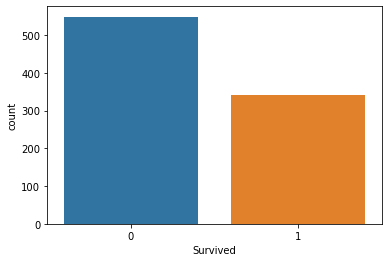

In [10]:
ax = sns.countplot(x="Survived", data=df,)

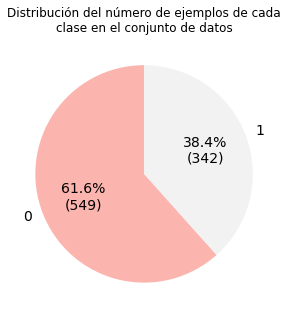

In [11]:
conteo_clase.plot(kind='pie', 
                                    figsize=(5, 5),
                                    #autopct='%1.1f%%',  #Esto muestra úicamente el porcentaje de ejemplos de cada categoría en el gráfico. 
                                    autopct=lambda pct: '{:.1f}%\n({:d})'.format(pct, int(pct/100.*conteo_clase.sum())), #Con esta función lambda se puede mostrar el porcentaje y el número absoluto de ejemplos en cada categoría. 
                                    startangle=90,       #Esto define la orientación de la línea vertical inicial de las divisiones del pie chart.
                                    fontsize=14,         #Tamaño de los textos.         
                                    cmap='Pastel1')      #Para otros color maps visite: https://matplotlib.org/stable/tutorials/colors/colormaps.html
titulo = 'Distribución del número de ejemplos de cada\nclase en el conjunto de datos'
plt.title(titulo) 
plt.ylabel('')
plt.show()

In [14]:
#atr = "PassengerId" #891 non-null    int64  
#atr = 'Pclass'       #891 non-null    int64  
#atr = 'Name'         #891 non-null    object 
#atr = 'Sex'          #891 non-null    object 
atr = 'Age'          #714 non-null    float64
#atr = 'SibSp'        #891 non-null    int64  
#atr = 'Parch'        #891 non-null    int64  
#atr = 'Ticket'       #891 non-null    object 
#atr = 'Fare'         #891 non-null    float64
#atr = 'Cabin'        #204 non-null    object 
#atr ='Embarked'     #889 non-null    object 

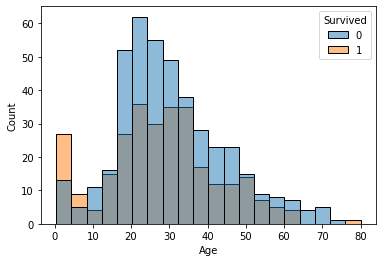

In [15]:
sns.histplot(x=df[atr],kde=False,hue=df['Survived'])
plt.show()

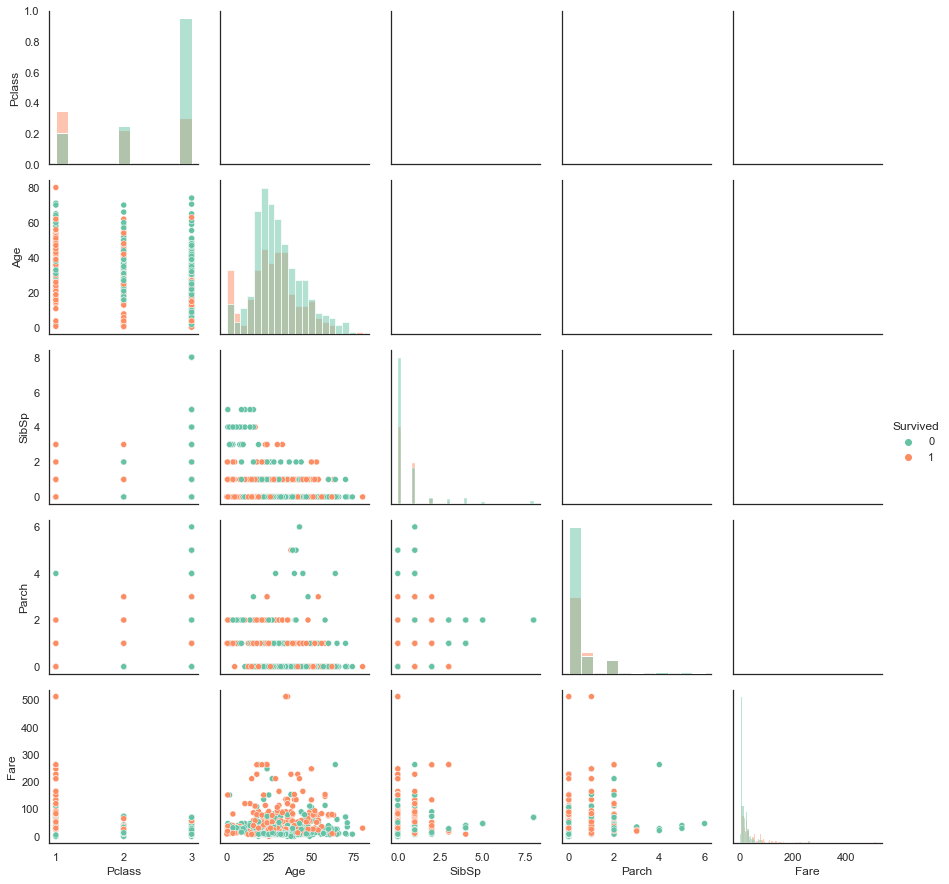

In [30]:
sns.set(style='white')
sns.set_palette('Set2')

g = sns.PairGrid(data=df.iloc[:,1:],hue='Survived',diag_sharey=False, corner=False)

g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)

g.add_legend()

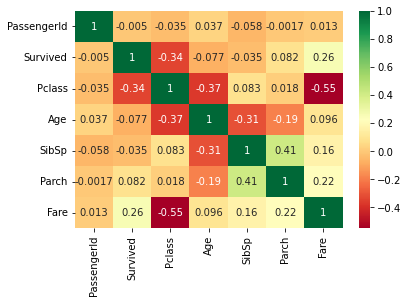

In [16]:
ax = sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

In [33]:
#atr = "PassengerId" #891 non-null    int64  
#atr = 'Pclass'       #891 non-null    int64  
#atr = 'Name'         #891 non-null    object 
atr = 'Sex'          #891 non-null    object 
#atr = 'Age'          #714 non-null    float64
#atr = 'SibSp'        #891 non-null    int64  
#atr = 'Parch'        #891 non-null    int64  
#atr = 'Ticket'       #891 non-null    object 
#atr = 'Fare'         #891 non-null    float64
#atr = 'Cabin'        #204 non-null    object 
#atr ='Embarked'     #889 non-null    object 

n_rows, n_cols = df.shape
count = (df[atr] == 0).sum()
print("Número de valores 0: ", count)
print("Porcentaje de valores cero en atributo " + atr + ": %.2f" % (100*count/n_rows))

Número de valores 0:  0
Porcentaje de valores cero en atributo Sex: 0.00


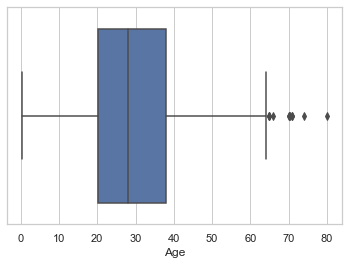

In [17]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['Age'])

In [18]:
women = df.loc[df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [19]:
men = df.loc[df.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [40]:
print("Missings for Age in the dataset: " + str(df['Age'].isnull().sum()))

Missings for Age in the dataset: 177


In [41]:
print("Missings in percentage: " + str(df['Age'].isnull().sum()/len(df)*100))

Missings in percentage: 19.865319865319865


In [42]:
print('Median for Age separated by Pclass:')
display(df.groupby('Pclass')['Age'].median())

Median for Age separated by Pclass:


Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [44]:
print('Median for Age separated by Pclass and Sex:')
display(df.groupby(['Pclass','Sex'])['Age'].median())

Median for Age separated by Pclass and Sex:


Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64